In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv("data.csv")
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [3]:
data.drop(data.columns[0], axis=1, inplace=True)

In [4]:
data.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


In [5]:
data["customerscore"]=np.nan
data.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,customerscore
0,D,Flight,4,2,177,3,low,F,44,1233,1,NaN
1,F,Flight,4,5,216,2,low,M,59,3088,1,NaN
2,A,Flight,2,2,183,4,low,M,48,3374,1,NaN
3,B,Flight,3,3,176,4,medium,M,10,1177,1,NaN
4,C,Flight,2,2,184,3,medium,F,46,2484,1,NaN


### Having good Customer Rating

In [6]:
good_rating=data.query('Customer_rating>=3')

In [7]:
good_rating

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,customerscore
1,F,Flight,4,5,216,2,low,M,59,3088,1,NaN
3,B,Flight,3,3,176,4,medium,M,10,1177,1,NaN
6,D,Flight,3,4,250,3,low,F,3,2371,1,NaN
8,A,Flight,3,4,150,3,low,F,11,1861,1,NaN
10,C,Flight,3,4,189,2,medium,M,12,2888,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
10987,F,Ship,5,3,242,5,low,F,10,1846,1,NaN
10988,A,Ship,4,3,192,4,low,F,2,1830,0,NaN
10990,C,Ship,5,4,219,6,low,M,3,1098,0,NaN
10996,C,Ship,5,4,242,5,low,F,4,1155,0,NaN


In [8]:
data.rename(columns={"Reached.on.Time_Y.N": "Reached_on_Time"},inplace=True)

### Product Reached on Time

In [9]:
data['Reached_on_Time'].value_counts(normalize=True) * 100

1    59.669061
0    40.330939
Name: Reached_on_Time, dtype: float64

### Plot of good Customer rating + shipment received time 

In [10]:
import seaborn as sns


In [11]:
totalcost = data['Cost_of_the_Product'].sum()
print (totalcost)

2311955


In [12]:
countorder=data['Cost_of_the_Product'].count()
print(countorder)

10999


In [13]:
avg=totalcost/countorder
print(avg)

210.19683607600692


### Customer Score

In [14]:
a=[]
for value in data['Prior_purchases']: 
    a.append(avg*value)
data['customerscore']=a
data.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_Time,customerscore
0,D,Flight,4,2,177,3,low,F,44,1233,1,630.590508
1,F,Flight,4,5,216,2,low,M,59,3088,1,420.393672
2,A,Flight,2,2,183,4,low,M,48,3374,1,840.787344
3,B,Flight,3,3,176,4,medium,M,10,1177,1,840.787344
4,C,Flight,2,2,184,3,medium,F,46,2484,1,630.590508


In [15]:
data['customerscore'].median()

630.5905082280208

In [16]:
goodscore=data.query('customerscore>=630')

1    4938
0    3462
Name: Reached_on_Time, dtype: int64


1    58.785714
0    41.214286
Name: Reached_on_Time, dtype: float64

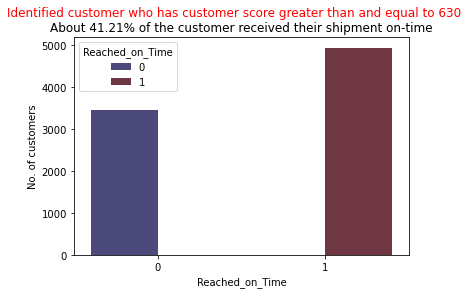

In [17]:
ax = sns.countplot(x="Reached_on_Time",data=goodscore, palette="icefire",hue="Reached_on_Time")
plt.ylabel("No. of customers")
plt.title("About 41.21% of the customer received their shipment on-time")


ax.text(-0.9, 5690, 'Identified customer who has customer score greater than and equal to 630',fontsize=12,color='red')
count1=goodscore['Reached_on_Time'].value_counts()
print(count1)
goodscore['Reached_on_Time'].value_counts(normalize=True)*100

### Pior purchased by Customer

In [18]:
recurringorder=data.query('Prior_purchases>=6')
recurringorder

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_Time,customerscore
37,F,Ship,2,4,181,6,medium,F,16,3605,1,1261.181016
62,A,Ship,5,1,105,6,medium,M,62,1292,1,1261.181016
74,A,Ship,6,1,238,6,low,F,13,2442,1,1261.181016
90,D,Ship,5,3,174,6,high,F,41,1085,1,1261.181016
133,F,Flight,5,4,280,6,medium,F,51,3582,1,1261.181016
...,...,...,...,...,...,...,...,...,...,...,...,...
10981,F,Ship,5,2,251,6,low,M,10,1196,0,1261.181016
10983,B,Ship,4,3,229,6,medium,M,1,1235,1,1261.181016
10990,C,Ship,5,4,219,6,low,M,3,1098,0,1261.181016
10993,F,Ship,5,1,257,6,low,F,1,1150,0,1261.181016


1    591
0    412
Name: Reached_on_Time, dtype: int64


1    58.92323
0    41.07677
Name: Reached_on_Time, dtype: float64

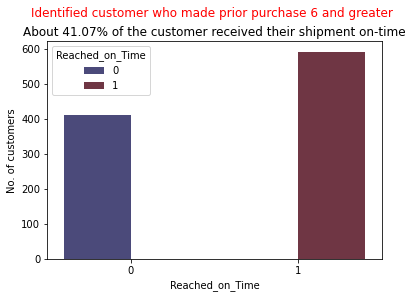

In [19]:
ax = sns.countplot(x="Reached_on_Time",data=recurringorder, palette="icefire",hue="Reached_on_Time")
plt.ylabel("No. of customers")
plt.title("About 41.07% of the customer received their shipment on-time")
#plt.title("Identified the customer who rated 3")
ax.text(-0.6, 690, 'Identified customer who made prior purchase 6 and greater',fontsize=12,color='red')
count2=recurringorder['Reached_on_Time'].value_counts()
print(count2)
recurringorder['Reached_on_Time'].value_counts(normalize=True)*100

### Highest Payment Buyers

In [20]:
data["Cost_of_the_Product"].max()

310

In [21]:
data["Cost_of_the_Product"].min()

96

In [22]:
medianvalue=data["Cost_of_the_Product"].median()

In [23]:
print(medianvalue)

214.0


In [24]:
higestpayment=data.query('Cost_of_the_Product>=214')

1    3136
0    2408
Name: Reached_on_Time, dtype: int64


1    56.565657
0    43.434343
Name: Reached_on_Time, dtype: float64

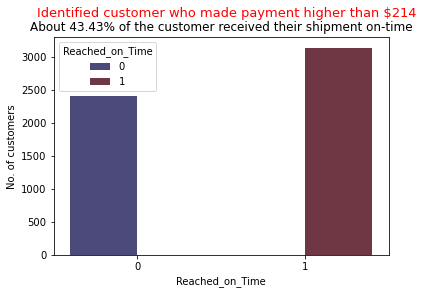

In [25]:
ax = sns.countplot(x="Reached_on_Time",data=higestpayment, palette="icefire",hue="Reached_on_Time")
plt.ylabel("No. of customers")
plt.title("About 43.43% of the customer received their shipment on-time")
#plt.title("Identified the customer who rated 3")
ax.text(-0.6, 3600, 'Identified customer who made payment higher than $214',fontsize=13,color='red')
count3=higestpayment['Reached_on_Time'].value_counts()
print(count3)
higestpayment['Reached_on_Time'].value_counts(normalize=True)*100

### Valuble Customer

In [26]:
mostvaluablecustomer=data[(data['Customer_rating'] >= 3)&(data['Prior_purchases']>=6)&(data['Cost_of_the_Product']>=214)&(data['customerscore']>=data['customerscore'].median())]

1    172
0    156
Name: Reached_on_Time, dtype: int64


1    52.439024
0    47.560976
Name: Reached_on_Time, dtype: float64

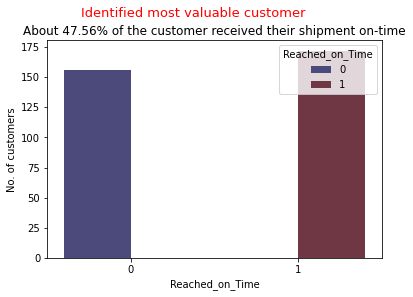

In [27]:
ax = sns.countplot(x="Reached_on_Time",data=mostvaluablecustomer, palette="icefire",hue="Reached_on_Time")
plt.ylabel("No. of customers")
plt.title("About 47.56% of the customer received their shipment on-time")
#plt.title("Identified the customer who rated 3")
ax.text(-0.3, 200, 'Identified most valuable customer',fontsize=13,color='red')
count4=mostvaluablecustomer['Reached_on_Time'].value_counts()
print(count4)
mostvaluablecustomer['Reached_on_Time'].value_counts(normalize=True)*100

# Basic Visulaization

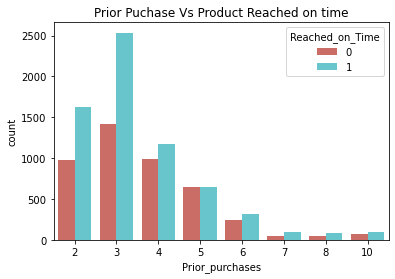

In [28]:
import seaborn as sb
from matplotlib import pyplot as plt
sb.countplot(x = "Prior_purchases", data = data, palette = "hls",hue="Reached_on_Time");
plt.title('Prior Puchase Vs Product Reached on time')
plt.show()

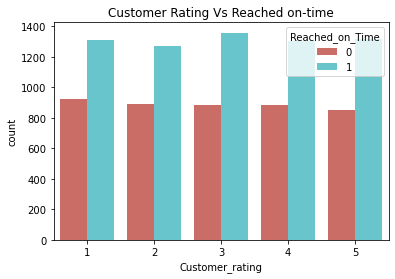

In [29]:
import seaborn as sb
from matplotlib import pyplot as plt
sb.countplot(x = "Customer_rating", data = data, palette = "hls",hue="Reached_on_Time");
plt.title('Customer Rating Vs Reached on-time')
plt.show()

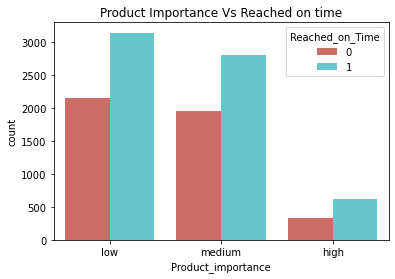

In [30]:
import seaborn as sb
from matplotlib import pyplot as plt
sb.countplot(x = "Product_importance", data = data, palette = "hls",hue="Reached_on_Time");
plt.title('Product Importance Vs Reached on time')
plt.show()

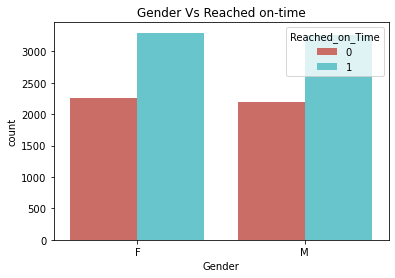

In [31]:
import seaborn as sb
from matplotlib import pyplot as plt
sb.countplot(x = "Gender", data = data, palette = "hls",hue="Reached_on_Time");
plt.title('Gender Vs Reached on-time')
plt.show()

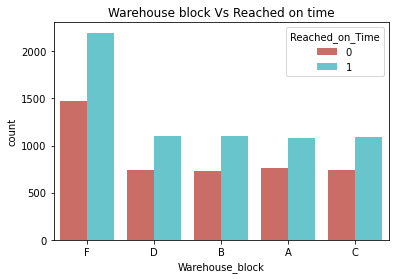

In [32]:
import seaborn as sb
from matplotlib import pyplot as plt
sb.countplot(x = "Warehouse_block", data = data, palette = "hls",hue="Reached_on_Time",order = data['Warehouse_block'].value_counts().index);
plt.title('Warehouse block Vs Reached on time')
plt.show()

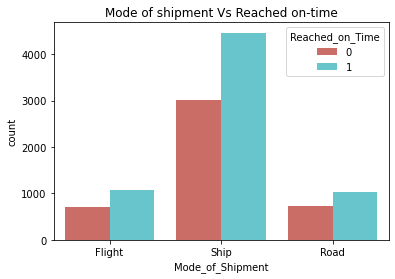

In [33]:
import seaborn as sb
from matplotlib import pyplot as plt
sb.countplot(x = "Mode_of_Shipment", data = data, palette = "hls",hue="Reached_on_Time");
plt.title('Mode of shipment Vs Reached on-time')
plt.show()

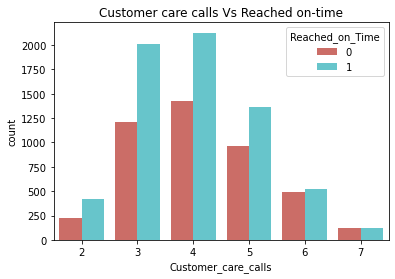

In [34]:
sb.countplot(x = "Customer_care_calls", data = data, palette = "hls",hue="Reached_on_Time");
plt.title('Customer care calls Vs Reached on-time')
plt.show()

Text(0.5, 0, 'Cost_of_the_Product')

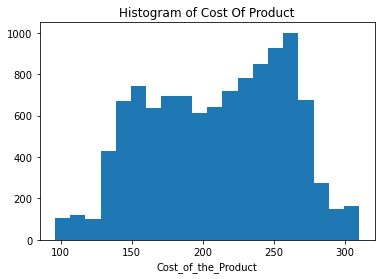

In [35]:
import matplotlib.pyplot as plt

plt.hist(data['Cost_of_the_Product'], bins = 20)
plt.title('Histogram of Cost Of Product')
plt.xlabel('Cost_of_the_Product')